## IMDB Datasets

In [2]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.datasets import imdb
# https://www.imdb.com/
(X, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
# text to vector
def vect(seq, dim=10000):
    x=np.zeros((len(seq),dim))
    for n, i in enumerate(seq):
        x[n, i] = 1
    return x

X_train=vect(X)
X_test=vect(X_test)

In [4]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [5]:
net = models.Sequential()
net.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(16, activation='relu'))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(1, activation='sigmoid'))
net.compile(optimizer='nadam', loss='binary_crossentropy', metrics = ['acc'])

X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

val = net.fit(partial_X_train, partial_y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/5
118/118 [==============================] - 3s 16ms/step - loss: 0.6562 - acc: 0.5791 - val_loss: 0.3891 - val_acc: 0.8662
Epoch 2/5
118/118 [==============================] - 1s 12ms/step - loss: 0.4110 - acc: 0.8347 - val_loss: 0.2965 - val_acc: 0.8782
Epoch 3/5
118/118 [==============================] - 2s 13ms/step - loss: 0.2909 - acc: 0.8952 - val_loss: 0.2936 - val_acc: 0.8772
Epoch 4/5
118/118 [==============================] - 1s 12ms/step - loss: 0.2233 - acc: 0.9217 - val_loss: 0.2794 - val_acc: 0.8885
Epoch 5/5
118/118 [==============================] - 1s 12ms/step - loss: 0.1762 - acc: 0.9411 - val_loss: 0.3168 - val_acc: 0.8841


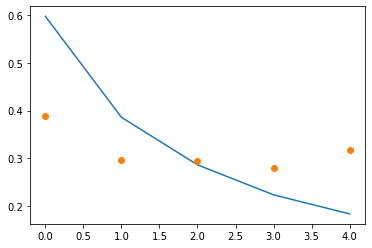

In [6]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']
x = np.arange(0,len(loss))

plt.plot(x,loss,'-')
plt.plot(x,val_loss,'o')

In [7]:
test_loss, test_acc = net.evaluate(X_test,y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.3365 - acc: 0.8756


### IMDB Classification using simple RNN

In [8]:
from keras.preprocessing import sequence

max_words=10000 
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

maxlen = 100 # sequence length
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
train = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(1000).batch(32)
test = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [9]:
X_train[0]

array([1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,   14,
        407,   16,   82,    2,    8,    4,  107,  117, 5952,   15,  256,
          4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,  476,
         26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,   88,
          4,  381,   15,  297,   98,   32, 2071,   56,   26,  141,    6,
        194, 7486,   18,    4,  226,   22,   21,  134,  476,   26,  480,
          5,  144,   30, 5535,   18,   51,   36,   28,  224,   92,   25,
        104,    4,  226,   65,   16,   38, 1334,   88,   12,   16,  283,
          5,   16, 4472,  113,  103,   32,   15,   16, 5345,   19,  178,
         32], dtype=int32)

In [10]:
rnn = models.Sequential()
rnn.add(layers.Embedding(max_words, 16)) 
rnn.add(layers.SimpleRNN(32,return_sequences='True')) 
rnn.add(layers.Dense(1, activation = 'sigmoid'))

In [11]:
rnn.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
rnn2=rnn.fit(train, validation_data=test, epochs=10)


Epoch 1/10
782/782 [==============================] - 21s 26ms/step - loss: 0.4105 - accuracy: 0.8084 - val_loss: 0.5318 - val_accuracy: 0.7276
Epoch 2/10
782/782 [==============================] - 20s 26ms/step - loss: 0.3864 - accuracy: 0.8218 - val_loss: 0.5835 - val_accuracy: 0.7221
Epoch 3/10
782/782 [==============================] - 20s 26ms/step - loss: 0.3577 - accuracy: 0.8348 - val_loss: 0.6200 - val_accuracy: 0.7180
Epoch 4/10
782/782 [==============================] - 20s 26ms/step - loss: 0.3380 - accuracy: 0.8445 - val_loss: 0.6090 - val_accuracy: 0.7131
Epoch 5/10
782/782 [==============================] - 21s 26ms/step - loss: 0.3119 - accuracy: 0.8558 - val_loss: 0.6229 - val_accuracy: 0.7116
Epoch 6/10
782/782 [==============================] - 21s 26ms/step - loss: 0.2886 - accuracy: 0.8666 - val_loss: 0.7414 - val_accuracy: 0.7037
Epoch 7/10
782/782 [==============================] - 21s 26ms/step - loss: 0.2731 - accuracy: 0.8739 - val_loss: 0.8315 - val_accuracy:

In [25]:
score, acc = rnn.evaluate(X_test, y_test, verbose=0)

In [27]:
print (score, acc)

[0.8254680633544922, 0.6941270232200623] 0.6941270232200623
